In [1]:
from diffusers import StableDiffusionPipeline


In [2]:
pipeline = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base").to("cuda")


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

c:\Users\lucasmeyer\personal\diffusers\.venv\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [3]:
style = """illustration, high detail, realistic shaded lighting by ilya kuvshinov and michael garmash and rob rey, 
iamag premiere, wlop matte print, 8k resolution, a masterpiece"""

prompt1 = "blue Twitter bird on fence"

prompt2 = "standard schnauzer dog, running on spaceship, gray fur, wearing jedi hood, holding lightsaber in mouth"

prompt3 = "disney librarian being hit by lightning, brown hair, grey eyes, cute face, wearing black turtleneck, behind desk"

prompt4 = "schnauzer dog with yoda body, chasing a ball, in a spaceship"

prompt5 = "schnauzer dog wizard, harry potter style, riding a broom, wearing glasses"

prompt6 = "schnauzer police dog, wearing deerstalker hat, grey fur"

prompt7 = "schnauzer dog as a pirate captain, on a pirate ship, grey fur"

prompt8 = "schnauzer dog rapunzel, on a tower, grey fur"

filename = "robot_cow.png"
prompt9 = "cow and robot, on a farm"

In [4]:

negative_prompt1 = """
ugly, tiling, poorly drawn hands, poorly drawn paws, poorly drawn feet, poorly drawn face, out of frame, extra limbs
"""

In [5]:
prompt = f"{prompt9}, {style}"
negative_prompt = negative_prompt1

In [6]:
image = pipeline(prompt=prompt, negative_prompt=negative_prompt, height=512, width=512, num_inference_steps=72, guidance_scale=6.0).images[0]


  0%|          | 0/72 [00:00<?, ?it/s]

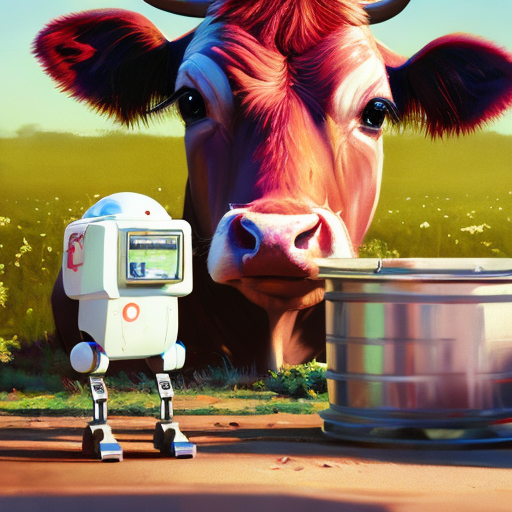

In [7]:
image

In [8]:
image.save(f"local_data/{filename}")

In [8]:
from dotenv import load_dotenv
import os

In [6]:
load_dotenv()

True

In [10]:
from azure.storage.blob import BlobServiceClient

# Replace with your connection string
connection_string = os.getenv("AZURE_STORAGE_CONN")

# Replace with your container name
container_name = "blog-images"

# Replace with your blob name
blob_name = filename

# Replace with the path to your local file
local_file_path = f"local_data/{filename}"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)
blob_client = container_client.get_blob_client(blob_name)

with open(local_file_path, "rb") as data:
    blob_client.upload_blob(data)